In [1]:
import scanpy as sc
import numpy as np

import stabilized_ica as ica
import scycle as scc

import sys
DATA_PATH = '/home/risitop/OneDrive/Documents/PHD/y1/data/COLON_CANCER_CELLLINES/'
sys.path.append(DATA_PATH)

In [12]:
def filter_mt(adata):
    adata = adata.copy()
    adata.var['mt'] = adata.var_names.str.startswith('MT-')
    sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
    inds1 = np.where((adata.obs['total_counts']>15000) & (adata.obs['total_counts']<50000))
    inds2 = np.where(adata.obs['pct_counts_mt']<15)
    print(len(inds1[0]),'samples pass the count filter')
    print(len(inds2[0]),' samples pass the mt filter')
    ind_samples = np.intersect1d(inds1[0],inds2[0])
    print('Samples selected',len(ind_samples))
    adata = adata[ind_samples,:]
    return adata

def early_processing(adata):
    adata = adata.copy()
    adata.obs_names = adata.obs_names.str.decode('utf-8')
    adata.var_names = adata.var_names.str.decode('utf-8')
    
    # Raw QC
    adata.var_names_make_unique()
    adata.obs_names_make_unique()
    sc.pp.filter_cells(adata, min_genes=200)
    sc.pp.filter_genes(adata, min_cells=3)
    
    return adata
    
def select_variable_genes(adata):
    adata = adata.copy()
    
    # Select variable genes
    sc.pp.highly_variable_genes(adata, n_top_genes=10001, n_bins=20)
    adata = adata[:,np.where(adata.var['highly_variable'])[0]]
    
    return adata

In [13]:
# Loading data

adatas = []
for i in (1 + np.arange(5)):
    adatas.append(sc.read(DATA_PATH + 'nbu' + str(i) + '.txt', cache=True).T)

In [18]:
for i, adata in enumerate(adatas):
    adata = early_processing(adata)
    adata = filter_mt(adata)
    scc.pp.prep_pooling(adata)
    adata = select_variable_genes(adata)
    scc.pp.score_cell_cycle(adata)
    adatas[i] = adata

/home/risitop/.local/share/virtualenvs/new_pipenv-jbJWqQFO/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


1115 samples pass the count filter
3155  samples pass the mt filter
Samples selected 1115
Preparing embedding...


/home/risitop/.local/share/virtualenvs/new_pipenv-jbJWqQFO/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/risitop/.local/share/virtualenvs/new_pipenv-jbJWqQFO/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
Trying to set attribute `.uns` of view, copying.


Embedding for pooling...
Pooling 1115 samples...


Trying to set attribute `.uns` of view, copying.
/home/risitop/.local/share/virtualenvs/new_pipenv-jbJWqQFO/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/risitop/.local/share/virtualenvs/new_pipenv-jbJWqQFO/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
Trying to set attribute `.uns` of view, copying.


-- Scoring G1 genes...


/home/risitop/.local/share/virtualenvs/new_pipenv-jbJWqQFO/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/risitop/.local/share/virtualenvs/new_pipenv-jbJWqQFO/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
Trying to set attribute `.obs` of view, copying.


-- Scoring S-phase...
-- Scoring G2-M...


/home/risitop/.local/share/virtualenvs/new_pipenv-jbJWqQFO/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


-- Scoring Histones...
Found histone genes: H1FX H2AFZ H2AFV H2AFX H2AFJ H3F3B H1F0
-- Scalling signatures...


/home/risitop/.local/share/virtualenvs/new_pipenv-jbJWqQFO/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


1944 samples pass the count filter
4916  samples pass the mt filter
Samples selected 1944
Preparing embedding...


/home/risitop/.local/share/virtualenvs/new_pipenv-jbJWqQFO/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/risitop/.local/share/virtualenvs/new_pipenv-jbJWqQFO/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
Trying to set attribute `.uns` of view, copying.


Embedding for pooling...
Pooling 1944 samples...


Trying to set attribute `.uns` of view, copying.
/home/risitop/.local/share/virtualenvs/new_pipenv-jbJWqQFO/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/risitop/.local/share/virtualenvs/new_pipenv-jbJWqQFO/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
Trying to set attribute `.uns` of view, copying.


-- Scoring G1 genes...


/home/risitop/.local/share/virtualenvs/new_pipenv-jbJWqQFO/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/risitop/.local/share/virtualenvs/new_pipenv-jbJWqQFO/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
Trying to set attribute `.obs` of view, copying.


-- Scoring S-phase...
-- Scoring G2-M...
-- Scoring Histones...
Found histone genes: H3F3A H1FX H2AFZ H2AFY H2AFV H2AFX H2AFY2 H2AFJ H3F3B H1F0
-- Scalling signatures...


/home/risitop/.local/share/virtualenvs/new_pipenv-jbJWqQFO/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/risitop/.local/share/virtualenvs/new_pipenv-jbJWqQFO/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


2118 samples pass the count filter
4342  samples pass the mt filter
Samples selected 2118
Preparing embedding...


/home/risitop/.local/share/virtualenvs/new_pipenv-jbJWqQFO/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/risitop/.local/share/virtualenvs/new_pipenv-jbJWqQFO/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
Trying to set attribute `.uns` of view, copying.


Embedding for pooling...
Pooling 2118 samples...


Trying to set attribute `.uns` of view, copying.
/home/risitop/.local/share/virtualenvs/new_pipenv-jbJWqQFO/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/risitop/.local/share/virtualenvs/new_pipenv-jbJWqQFO/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
Trying to set attribute `.uns` of view, copying.


-- Scoring G1 genes...


/home/risitop/.local/share/virtualenvs/new_pipenv-jbJWqQFO/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/risitop/.local/share/virtualenvs/new_pipenv-jbJWqQFO/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
Trying to set attribute `.obs` of view, copying.


-- Scoring S-phase...
-- Scoring G2-M...
-- Scoring Histones...
Found histone genes: H1FX H1FX-AS1 H2AFV H2AFX H2AFY2 H2AFJ H3F3B H1F0
-- Scalling signatures...


/home/risitop/.local/share/virtualenvs/new_pipenv-jbJWqQFO/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/risitop/.local/share/virtualenvs/new_pipenv-jbJWqQFO/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


2074 samples pass the count filter
4951  samples pass the mt filter
Samples selected 2074
Preparing embedding...


/home/risitop/.local/share/virtualenvs/new_pipenv-jbJWqQFO/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/risitop/.local/share/virtualenvs/new_pipenv-jbJWqQFO/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
Trying to set attribute `.uns` of view, copying.


Embedding for pooling...
Pooling 2074 samples...


Trying to set attribute `.uns` of view, copying.
/home/risitop/.local/share/virtualenvs/new_pipenv-jbJWqQFO/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/risitop/.local/share/virtualenvs/new_pipenv-jbJWqQFO/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
Trying to set attribute `.uns` of view, copying.


-- Scoring G1 genes...


/home/risitop/.local/share/virtualenvs/new_pipenv-jbJWqQFO/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/risitop/.local/share/virtualenvs/new_pipenv-jbJWqQFO/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
Trying to set attribute `.obs` of view, copying.


-- Scoring S-phase...
-- Scoring G2-M...
-- Scoring Histones...
Found histone genes: H3F3A H1FX H2AFZ H2AFV H2AFX H2AFY2 H2AFJ H3F3C H3F3B H1F0
-- Scalling signatures...


/home/risitop/.local/share/virtualenvs/new_pipenv-jbJWqQFO/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/risitop/.local/share/virtualenvs/new_pipenv-jbJWqQFO/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


1736 samples pass the count filter
4541  samples pass the mt filter
Samples selected 1736
Preparing embedding...


/home/risitop/.local/share/virtualenvs/new_pipenv-jbJWqQFO/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/risitop/.local/share/virtualenvs/new_pipenv-jbJWqQFO/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
Trying to set attribute `.uns` of view, copying.


Embedding for pooling...
Pooling 1736 samples...


Trying to set attribute `.uns` of view, copying.
/home/risitop/.local/share/virtualenvs/new_pipenv-jbJWqQFO/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/risitop/.local/share/virtualenvs/new_pipenv-jbJWqQFO/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
Trying to set attribute `.uns` of view, copying.


-- Scoring G1 genes...


/home/risitop/.local/share/virtualenvs/new_pipenv-jbJWqQFO/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/risitop/.local/share/virtualenvs/new_pipenv-jbJWqQFO/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
Trying to set attribute `.obs` of view, copying.


-- Scoring S-phase...
-- Scoring G2-M...
-- Scoring Histones...
Found histone genes: H3F3A H1FX H2AFX H2AFJ H3F3B H1F0
-- Scalling signatures...


/home/risitop/.local/share/virtualenvs/new_pipenv-jbJWqQFO/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/risitop/.local/share/virtualenvs/new_pipenv-jbJWqQFO/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


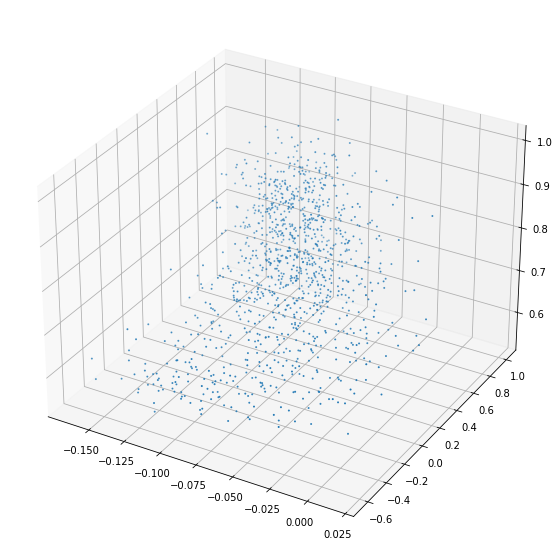

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d.axes3d as p3

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for adata in adatas:
    ax.scatter(adata.obs['G1'].values, adata.obs['G2-M'].values, adata.obs['Histones'].values, s=1)
    break

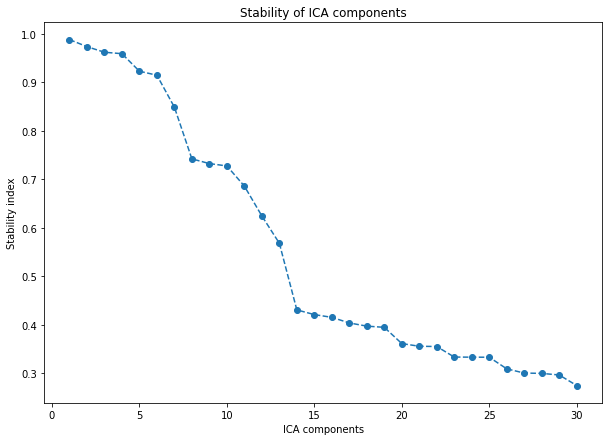

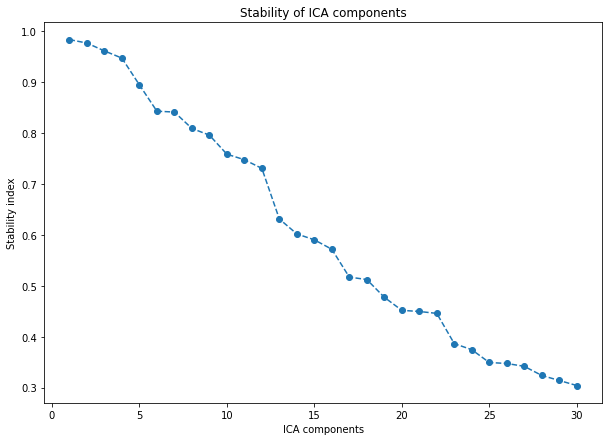

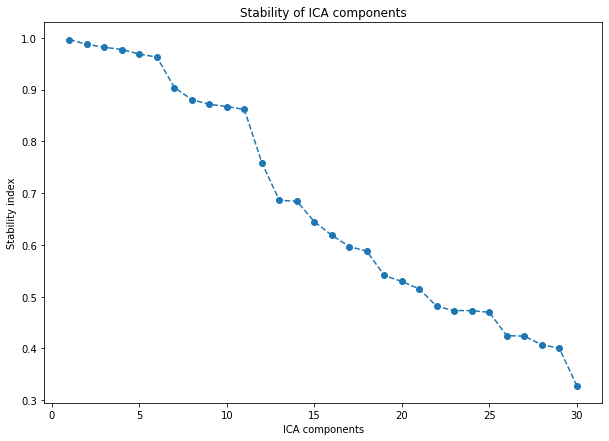

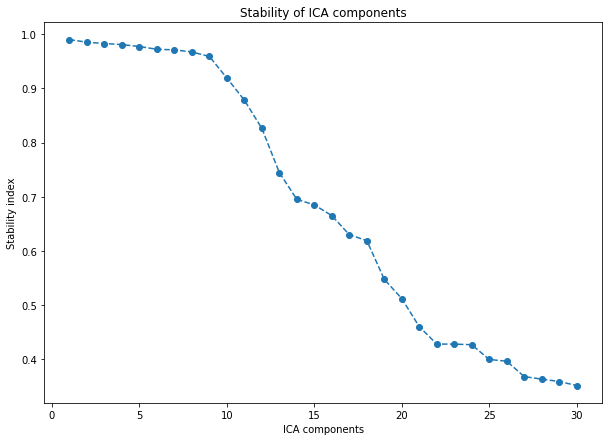

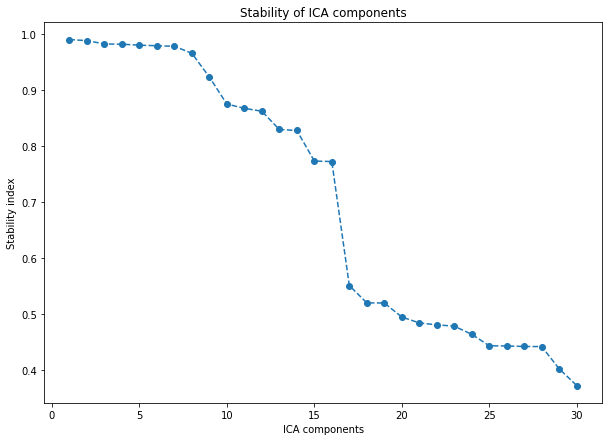

In [32]:
sICAs = []
for adata in adatas:
    sICA = ica.StabilizedICA(n_components=30, max_iter=1000, n_jobs=4)
    sICA.fit(adata.X , n_runs = 30 , plot = True , normalize = True)
    sICAs.append(sICA)

In [39]:
for i, sICA in enumerate(sICAs):
    np.savetxt(DATA_PATH + 'ica/nbu%i_S.txt' % (i+1), sICA.S_, delimiter=',')
    np.savetxt(DATA_PATH + 'ica/nbu%i_A.txt' % (i+1), sICA.A_, delimiter=',')